In [2]:
import csv
import glob
import pandas as pd
import codecs
import chardet

# Set the path to the directory containing the CSV files
path = r'C:\Users\mehad\Fuel_Consumption_Dataset'

# Use the glob function to find all CSV files in the directory
all_files = glob.glob(path + "/*.csv")  

# Data Preparation

In [3]:
def remove_empty_cells(row):
    new_list = []
    for x in row:
        if x != '':
            new_list.append(x)
    return new_list

In [4]:
def append_data_rows(csv_reader, data):
    # Loop through the remaining rows using a while loop
    while True:
        try:
            row = next(csv_reader)
            if any(row):
                 # Cleanup empty cells from row before appending
                data.append(remove_empty_cells(row))
            else:
                break
        except StopIteration:
            break
    return data

In [5]:
def remove_special_characters(string):
    # A list of special_characters to be removed
    special_characters=['@','#','$','*','&']
    normal_string=string
    for i in special_characters:
    # Replace the special character with an empty string
        normal_string=normal_string.replace(i,"")
    return normal_string

In [6]:
def convert_encoding(filename):

    # Open the input file with the original encoding
    with codecs.open(filename, 'r', 'windows-1252') as input_file:
        # Read the contents of the input file
        contents = input_file.read()

    # Open the output file with the new encoding
    with codecs.open(filename, 'w', 'utf-8') as output_file:
        # Write the contents of the input file to the output file with the new encoding
        output_file.write(contents)

In [7]:
# Initialize an empty list to store the dataframes
dfs = []

# Loop through each file and read the first five rows using csv.reader
for filename in all_files:
    # Initialize an empty list to store the concatenated data
    concat_data = []
    
    # convert_encoding(filename)

    with open(filename, 'r', encoding='windows-1252') as csvfile:
        # print('Reading file:' + filename)
        # result = chardet.detect(csvfile.read())
        # print(result['encoding'])
        
        csv_reader = csv.reader(csvfile)
        
        # Cleanup header rows for the first file
        header1 = next(csv_reader)
        header2 = next(csv_reader)
        for index, column in enumerate(header1):
            # Cleanup header value to be consistent with other files
            if 'high output engine' in header2[index]:
                header2[index] = ''
            
            # Cleanup headers by removing special characters
            header1[index] = remove_special_characters(header1[index])
            header2[index] = remove_special_characters(header2[index])
                
            header1[index] = header1[index].lower().strip() + ' ' + header2[index].lower().strip()
            header1[index] = header1[index].strip()
            header1[index] = header1[index].replace("  ", "_")
            header1[index] = header1[index].replace(" ", "_")
            # if (header1[index] == ''):
            #    header1.remove(header1[index])
        
        # Cleanup empty cells from header list
        header1 = remove_empty_cells(header1)
        
        # Append data rows
        concat_data = append_data_rows(csv_reader, concat_data)
        
        # Remove duplicates from headers
        # header1 = [x if x not in header1[:i] else f"{x}_{header1[:i].count(x)}" for i, x in enumerate(header1)]
       
        df = pd.DataFrame(concat_data, columns=header1)
        
        columns = df.columns.tolist()
        print(columns)
        dfs.append(df)

['model_year', 'make', 'model', 'vehicle_class', 'engine_size_(l)', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city_(l/100_km)', 'hwy_(l/100_km)', 'comb_(l/100_km)', 'comb_(mpg)', 'co2_emissions_(g/km)']
['model_year', 'make', 'model', 'vehicle_class', 'engine_size_(l)', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city_(l/100_km)', 'hwy_(l/100_km)', 'comb_(l/100_km)', 'comb_(mpg)', 'co2_emissions_(g/km)']
['model_year', 'make', 'model', 'vehicle_class', 'engine_size_(l)', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city_(l/100_km)', 'hwy_(l/100_km)', 'comb_(l/100_km)', 'comb_(mpg)', 'co2_emissions_(g/km)', 'co2_rating']
['model_year', 'make', 'model', 'vehicle_class', 'engine_size_(l)', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city_(l/100_km)', 'hwy_(l/100_km)', 'comb_(l/100_km)', 'comb_(mpg)', 'co2_emissions_(g/km)', 'co2_rating', 'smog_rating']
['model_year', 'make', 'model', 'vehicle_class', 'engine_size_(l)', 'cyli

In [8]:
# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, axis=0)

In [9]:
combined_df

,model_year,make,model,vehicle_class,engine_size_(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),hwy_(l/100_km),comb_(l/100_km),comb_(mpg),co2_emissions_(g/km),co2_rating,smog_rating
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219,NaN,NaN
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205,NaN,NaN
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230,NaN,NaN
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304,NaN,NaN
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.2,7.9,9.2,31,215,5,5
817,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.3,8.2,9.4,30,218,5,5
818,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.1,8.7,10.0,28,233,5,7
819,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4,AS8,Z,10.5,8.4,9.6,29,223,5,5


In [10]:
#combined_df.to_csv('C:\Users\mehad\Fuel_Consumption_Dataset_merged.csv', index=False)

In [11]:
combined_df.shape

(14523, 15)

In [12]:
combined_df.dtypes

model_year                          object
make                                object
model                               object
vehicle_class                       object
engine_size_(l)                     object
cylinders                           object
transmission                        object
fuel_type                           object
fuel_consumption_city_(l/100_km)    object
hwy_(l/100_km)                      object
comb_(l/100_km)                     object
comb_(mpg)                          object
co2_emissions_(g/km)                object
co2_rating                          object
smog_rating                         object
dtype: object

In [13]:
# Count missing values in each column
missing_values = combined_df.isnull().sum()

# Print missingness of each column
print(missing_values)


model_year                             0
make                                   0
model                                  0
vehicle_class                          0
engine_size_(l)                        0
cylinders                              0
transmission                           0
fuel_type                              0
fuel_consumption_city_(l/100_km)       0
hwy_(l/100_km)                         0
comb_(l/100_km)                        0
comb_(mpg)                             0
co2_emissions_(g/km)                   0
co2_rating                          6491
smog_rating                         7601
dtype: int64


# 1. Data Cleaning : Missing value imputation

In [14]:
missing_data_col_df = combined_df[['co2_rating', 'smog_rating']]
missing_data_col_df.head()

,co2_rating,smog_rating
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer

# Create an instance of the SimpleImputer class with the 'median' strategy
# imputer = SimpleImputer(strategy='median')
# imputer = IterativeImputer()

# create KNN imputer object with k=5 (can be adjusted as needed)
imputer = KNNImputer(n_neighbors=5,weights='uniform', metric='nan_euclidean')

# Fit the imputer on the dataframe and transform it
imputed_df = pd.DataFrame(imputer.fit_transform(missing_data_col_df))

# Replace the column names and index of the imputed dataframe with the original dataframe
imputed_df.columns = missing_data_col_df.columns
imputed_df.index = missing_data_col_df.index

imputed_df.head()

,co2_rating,smog_rating
0,4.6438,4.747183
1,4.6438,4.747183
2,4.6438,4.747183
3,4.6438,4.747183
4,4.6438,4.747183


In [16]:
import numpy as np
imputed_df = np.round(imputed_df)

In [17]:
# replace columns co2_rating and smog_rating of combined_df with columns co2_rating and smog_rating of imputed_df
combined_df.update(imputed_df[['co2_rating', 'smog_rating']])
combined_df.head()

,model_year,make,model,vehicle_class,engine_size_(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),hwy_(l/100_km),comb_(l/100_km),comb_(mpg),co2_emissions_(g/km),co2_rating,smog_rating
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219,5.0,5.0
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205,5.0,5.0
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230,5.0,5.0
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304,5.0,5.0
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274,5.0,5.0


In [18]:
# Count missing values in each column again for checking
missing_values = combined_df.isnull().sum()
print(missing_values)

model_year                          0
make                                0
model                               0
vehicle_class                       0
engine_size_(l)                     0
cylinders                           0
transmission                        0
fuel_type                           0
fuel_consumption_city_(l/100_km)    0
hwy_(l/100_km)                      0
comb_(l/100_km)                     0
comb_(mpg)                          0
co2_emissions_(g/km)                0
co2_rating                          0
smog_rating                         0
dtype: int64


In [19]:
combined_df.dtypes

model_year                          object
make                                object
model                               object
vehicle_class                       object
engine_size_(l)                     object
cylinders                           object
transmission                        object
fuel_type                           object
fuel_consumption_city_(l/100_km)    object
hwy_(l/100_km)                      object
comb_(l/100_km)                     object
comb_(mpg)                          object
co2_emissions_(g/km)                object
co2_rating                          object
smog_rating                         object
dtype: object

In [20]:
#Column type change : Data preparations
combined_df['engine_size_(l)'] = combined_df['engine_size_(l)'].astype('float64')
combined_df['cylinders'] = combined_df['cylinders'].astype('int64')
combined_df['fuel_consumption_city_(l/100_km)'] = combined_df['fuel_consumption_city_(l/100_km)'].astype('float64')
combined_df['hwy_(l/100_km)'] = combined_df['hwy_(l/100_km)'].astype('float64')
combined_df['comb_(l/100_km)'] = combined_df['comb_(l/100_km)'].astype('float64')
combined_df['comb_(mpg)'] = combined_df['comb_(mpg)'].astype('int64')
combined_df['co2_emissions_(g/km)'] = combined_df['co2_emissions_(g/km)'].astype('int64')
combined_df['co2_rating'] = combined_df['co2_rating'].astype('int')
combined_df['smog_rating'] = combined_df['smog_rating'].astype('int')


In [21]:
combined_df.dtypes

model_year                           object
make                                 object
model                                object
vehicle_class                        object
engine_size_(l)                     float64
cylinders                             int64
transmission                         object
fuel_type                            object
fuel_consumption_city_(l/100_km)    float64
hwy_(l/100_km)                      float64
comb_(l/100_km)                     float64
comb_(mpg)                            int64
co2_emissions_(g/km)                  int64
co2_rating                            int32
smog_rating                           int32
dtype: object

In [22]:
combined_df

,model_year,make,model,vehicle_class,engine_size_(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),hwy_(l/100_km),comb_(l/100_km),comb_(mpg),co2_emissions_(g/km),co2_rating,smog_rating
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219,5,5
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205,5,5
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230,5,5
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304,5,5
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.2,7.9,9.2,31,215,5,5
817,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.3,8.2,9.4,30,218,5,5
818,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.1,8.7,10.0,28,233,5,7
819,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4,AS8,Z,10.5,8.4,9.6,29,223,5,5


In [23]:
#Cleaning & preparation of vehicle class

# Convert vehicle class strings to lowercase and remove separators
combined_df['vehicle_class'] = combined_df['vehicle_class'].str.lower().str.replace('[-:]', ' ',regex=True)

# Replace 2 or more consecutive spaces with a single space
combined_df['vehicle_class'] = combined_df['vehicle_class'].str.replace('\s{2,}', ' ',regex=True)




In [24]:
combined_df

,model_year,make,model,vehicle_class,engine_size_(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),hwy_(l/100_km),comb_(l/100_km),comb_(mpg),co2_emissions_(g/km),co2_rating,smog_rating
0,2010,ACURA,CSX,compact,2.0,4,AS5,X,10.9,7.8,9.5,30,219,5,5
1,2010,ACURA,CSX,compact,2.0,4,M5,X,10.0,7.6,8.9,32,205,5,5
2,2010,ACURA,CSX,compact,2.0,4,M6,Z,11.6,8.1,10.0,28,230,5,5
3,2010,ACURA,MDX AWD,suv,3.7,6,AS6,Z,14.8,11.3,13.2,21,304,5,5
4,2010,ACURA,RDX AWD TURBO,suv,2.3,4,AS5,Z,13.2,10.3,11.9,24,274,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2023,Volvo,XC40 B5 AWD,suv small,2.0,4,AS8,Z,10.2,7.9,9.2,31,215,5,5
817,2023,Volvo,XC60 B5 AWD,suv small,2.0,4,AS8,Z,10.3,8.2,9.4,30,218,5,5
818,2023,Volvo,XC60 B6 AWD,suv small,2.0,4,AS8,Z,11.1,8.7,10.0,28,233,5,7
819,2023,Volvo,XC90 B5 AWD,suv standard,2.0,4,AS8,Z,10.5,8.4,9.6,29,223,5,5


# 2. Summary statistics

In [25]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size_(l),14523.0,3.274475,1.375796,0.9,2.0,3.0,4.0,8.4
cylinders,14523.0,5.745094,1.884094,2.0,4.0,6.0,6.0,16.0
fuel_consumption_city_(l/100_km),14523.0,12.994705,3.769584,4.0,10.4,12.5,15.0,30.6
hwy_(l/100_km),14523.0,9.404434,2.455247,3.9,7.7,9.0,10.6,20.9
comb_(l/100_km),14523.0,11.378985,3.142155,4.0,9.2,10.9,13.0,26.1
comb_(mpg),14523.0,26.648007,7.267313,11.0,22.0,26.0,31.0,71.0
co2_emissions_(g/km),14523.0,258.234043,62.109136,94.0,214.0,253.0,295.0,608.0
co2_rating,14523.0,4.803002,1.205659,1.0,4.0,5.0,5.0,10.0
smog_rating,14523.0,4.929904,1.292469,1.0,5.0,5.0,5.0,8.0


# 3. Correlation Plots

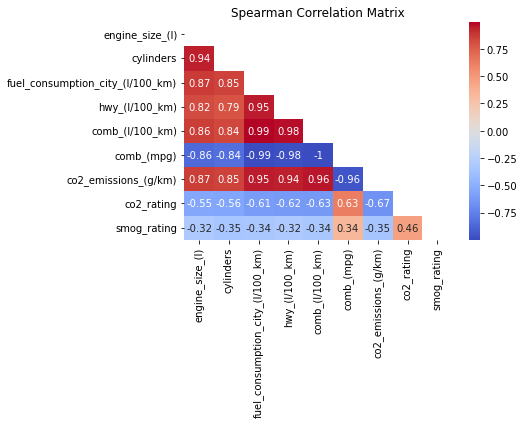

In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Compute the spearman correlation matrix
corr = combined_df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap with the lower triangle
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True)

# Set the title of the plot
plt.title("Spearman Correlation Matrix")

# Show the plot
plt.show()


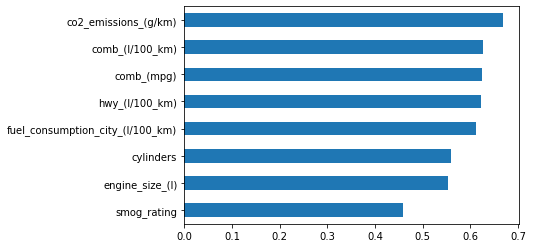

In [27]:
corr_matrix = abs(corr['co2_rating']).sort_values(ascending = True)[:-1].plot.barh()

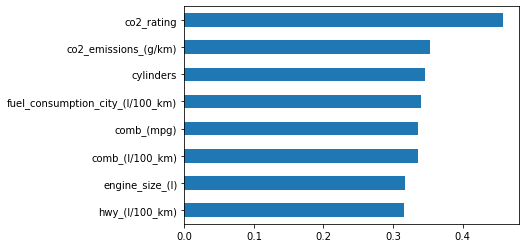

In [28]:
corr_matrix1 = abs(corr['smog_rating']).sort_values(ascending = True)[:-1].plot.barh()

# 4. Counts barplot of number of cars by model year:

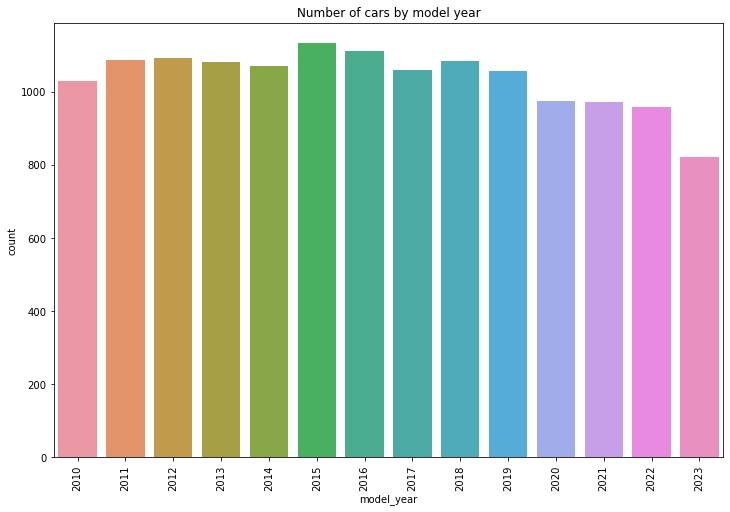

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(x='model_year', data=combined_df)
plt.xticks(rotation=90)
plt.title('Number of cars by model year')
plt.show()


# 5. How has the average CO2 emission changed over the years?

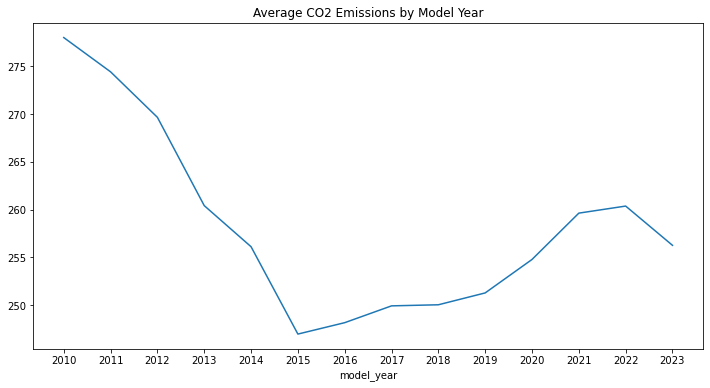

In [30]:
plt.figure(figsize=(12, 6))
average_co2 = combined_df.groupby('model_year')['co2_emissions_(g/km)'].mean()
sns.lineplot(x=average_co2.index, y=average_co2.values)
plt.title('Average CO2 Emissions by Model Year')
plt.show()



# 6. Investigation of drops and raise in co2 emissions respect to model year - through fuel type dependency

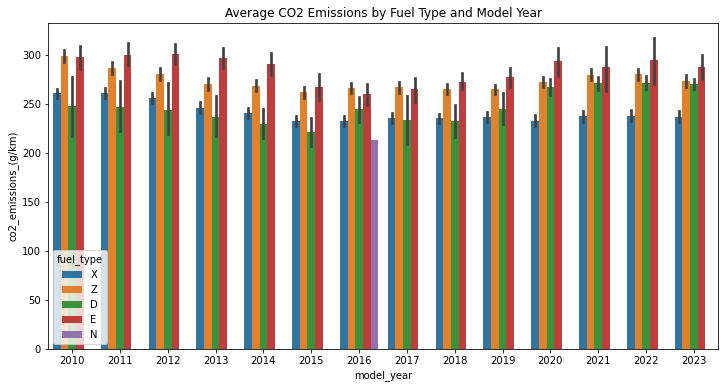

In [31]:

plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='co2_emissions_(g/km)', hue='fuel_type', data=combined_df)
plt.title('Average CO2 Emissions by Fuel Type and Model Year')
plt.show()

# 7. How do different transmission types affect fuel consumption?

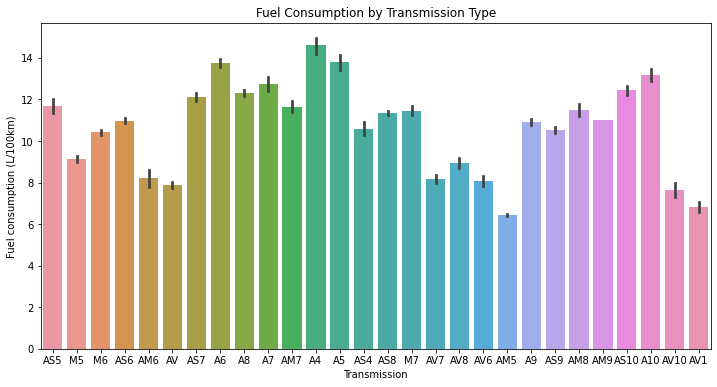

In [32]:

plt.figure(figsize=(12, 6))
sns.barplot(x='transmission', y='comb_(l/100_km)', data=combined_df)
plt.xlabel('Transmission')
plt.ylabel('Fuel consumption (L/100km)')
plt.title('Fuel Consumption by Transmission Type')
plt.show()


# 8. Is there a correlation between CO2 emissions and fuel consumption in the city by fuel type?

<AxesSubplot:xlabel='fuel_consumption_city_(l/100_km)', ylabel='co2_emissions_(g/km)'>

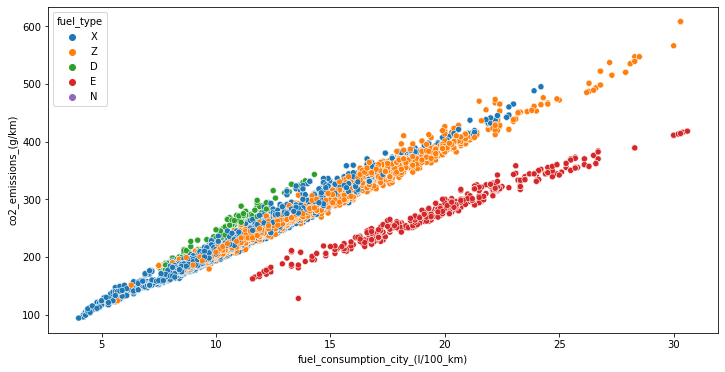

In [33]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fuel_consumption_city_(l/100_km)', y='co2_emissions_(g/km)', hue='fuel_type', data=combined_df)


# 9. Average combined fuel consumption for each Vehicle class and the breakdown of it by each fuel type

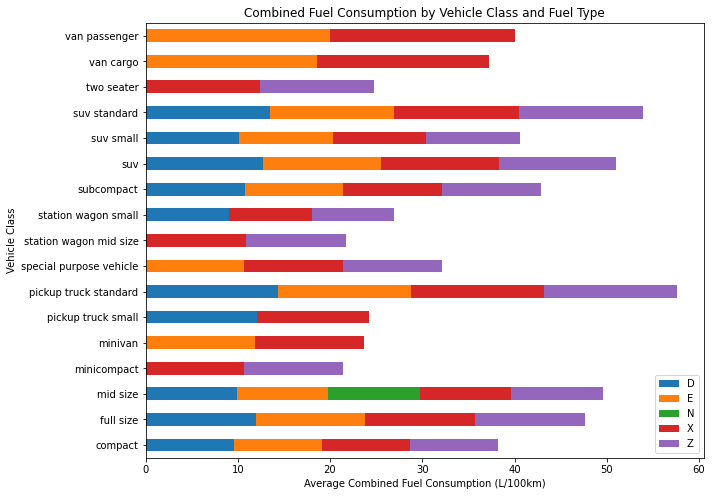

In [34]:


# Group by vehicle class and calculate the mean fuel consumption
grouped_df = combined_df.groupby('vehicle_class')['comb_(l/100_km)'].mean()

# Convert the resulting Series back to a DataFrame and reset the index
grouped_df = grouped_df.to_frame().reset_index()

# Merge the original DataFrame with the grouped DataFrame on the 'vehicle_class' column
merged_df = pd.merge(combined_df, grouped_df, on='vehicle_class')

# Rename the merged column to 'mean_comb_(l/100_km)'
merged_df = merged_df.rename(columns={'comb_(l/100_km)_y': 'mean_comb_(l/100_km)'})

# Get data for the chart
class_fuel_data = merged_df.groupby(['vehicle_class', 'fuel_type'])['mean_comb_(l/100_km)'].mean().unstack()

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
class_fuel_data.plot(kind='barh', stacked=True, ax=ax)

# Add chart labels and title
ax.set_xlabel('Average Combined Fuel Consumption (L/100km)')
ax.set_ylabel('Vehicle Class')
ax.set_title('Combined Fuel Consumption by Vehicle Class and Fuel Type')

# Set the legend location
ax.legend(loc='lower right')

# Show the chart
plt.show()


# 10. Range of ratings and how many vehicles fall into each rating category?

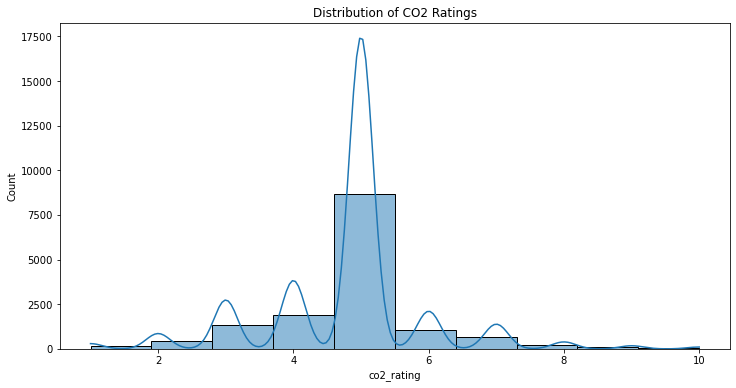

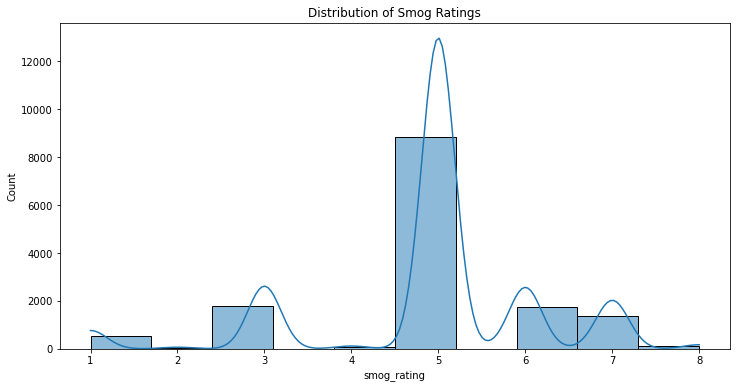

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data=combined_df['co2_rating'], bins=10, kde=True)
plt.title('Distribution of CO2 Ratings')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data=combined_df['smog_rating'], bins=10, kde=True)
plt.title('Distribution of Smog Ratings')
plt.show()



# 11.  Is there a significant difference in smog ratings between automatic and manual transmission vehicles

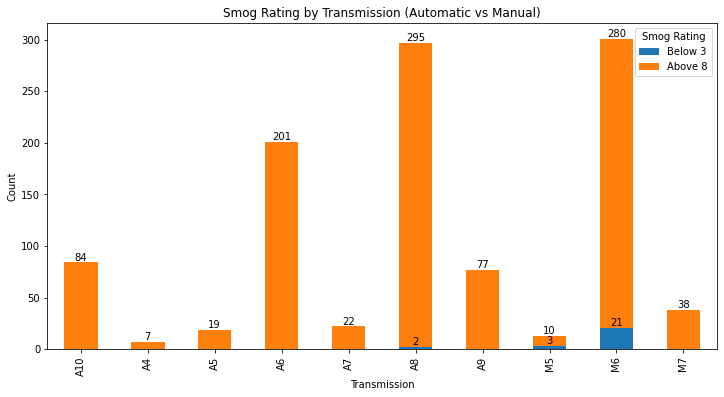

In [36]:
# Define a function to map smog ratings to "below 3" or "above 8"
def map_smog_rating(rating):
    if rating <= 3:
        return 'Below 3'
    elif rating >= 8:
        return 'Above 8'

# Add a new column to the dataframe with the mapped smog ratings
combined_df['smog_rating_level'] = combined_df['smog_rating'].apply(map_smog_rating)

# Filter the dataframe for only manual and automatic transmission
df = combined_df[(combined_df['transmission'].str.match('A\d+')) | (combined_df['transmission'].str.match('M\d+'))]

# Group by transmission and smog rating level
grouped_df = df.groupby(['transmission', 'smog_rating_level'])['smog_rating'].count().unstack()

# Rename the columns to "Below 3" and "Above 8"
grouped_df.columns = ['Below 3', 'Above 8']

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar plot with only two legends and data labels
colors = ['#1f77b4', '#ff7f0e']
grouped_df.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.legend(title='Smog Rating', labels=['Below 3', 'Above 8'])
plt.title('Smog Rating by Transmission (Automatic vs Manual)')
plt.xlabel('Transmission')
plt.ylabel('Count')

# Add data labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{int(p)}" if p != 0 else "" for p in i.datavalues])

# Show the plot
plt.show()


# 12. Are Higher CO2 Emissions Ratings More Common Among Certain Vehicle Classes?

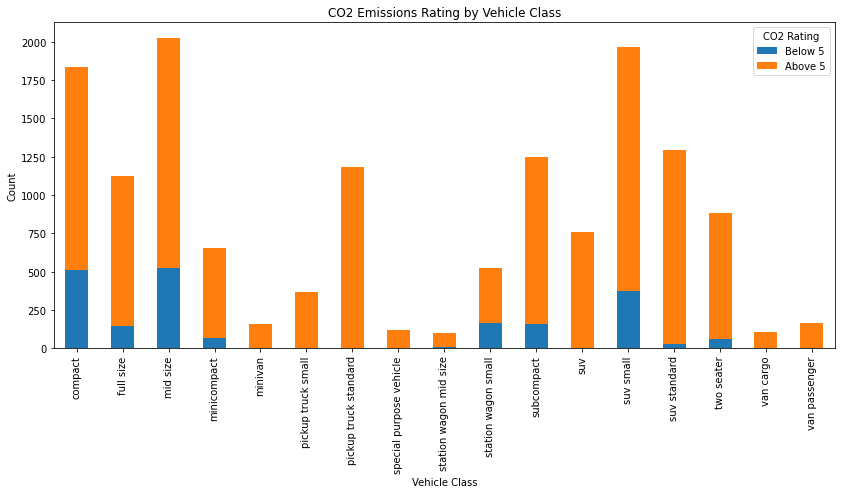

In [37]:
# Define a function to map CO2 ratings to "below 5" or "above 5"
def map_co2_rating(rating):
    if rating <= 5:
        return 'Below 5'
    else:
        return 'Above 5'

# Add a new column to the dataframe with the mapped CO2 ratings
combined_df['co2_rating_level'] = combined_df['co2_rating'].apply(map_co2_rating)

# Group by vehicle class and CO2 rating level
grouped_df = combined_df.groupby(['vehicle_class', 'co2_rating_level'])['co2_rating'].count().unstack()

# Rename the columns to "Below 5" and "Above 5"
grouped_df.columns = ['Below 5', 'Above 5']

# Set the size of the figure
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the stacked bar plot with only two legends
grouped_df.plot(kind='bar', stacked=True, ax=ax)
plt.legend(title='CO2 Rating', labels=['Below 5', 'Above 5'])
plt.title('CO2 Emissions Rating by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.show()


# 13. Comparing Smog Ratings for Different Fuel Types in Vehicles: Which Fuel Type Performs Better in Terms of Smog Emissions?

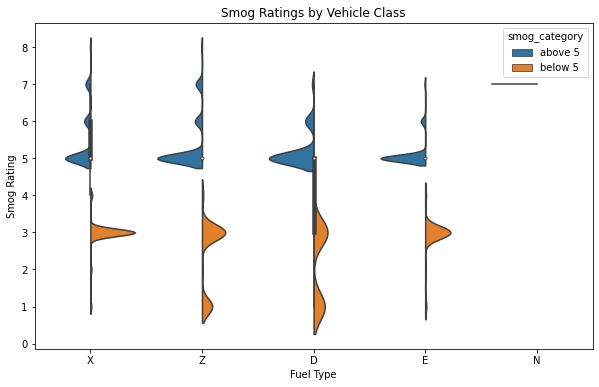

In [38]:
import seaborn as sns

plt.figure(figsize=(10,6))
smog_ratings = [1, 2, 3,4,5,6,7, 8, 9, 10]
df = combined_df[combined_df['smog_rating'].isin(smog_ratings)]
df['smog_category'] = df['smog_rating'].apply(lambda x: 'below 5' if x < 5 else 'above 5')
sns.violinplot(x='fuel_type', y='smog_rating', hue='smog_category', data=df, split=True)
plt.title('Smog Ratings by Vehicle Class')
plt.xlabel('Fuel Type')
plt.ylabel('Smog Rating')
plt.show()


In [39]:
# Remove the columns 'co2_rating_level' and 'smog_rating_level'
columns_to_drop = ['co2_rating_level', 'smog_rating_level']
combined_df.drop(columns=columns_to_drop, inplace=True)

# MODELLING

How can we predict the fuel consumption (comb_(l/100_km)) of a vehicle based on its characteristics in the dataset? -- Linear Regression

In [40]:
#Step 1: Import the necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score


In [41]:
combined_df.dtypes

model_year                           object
make                                 object
model                                object
vehicle_class                        object
engine_size_(l)                     float64
cylinders                             int64
transmission                         object
fuel_type                            object
fuel_consumption_city_(l/100_km)    float64
hwy_(l/100_km)                      float64
comb_(l/100_km)                     float64
comb_(mpg)                            int64
co2_emissions_(g/km)                  int64
co2_rating                            int32
smog_rating                           int32
dtype: object

Mean Squared Error: 8032192687883653.0
R-squared: -805627318846502.9


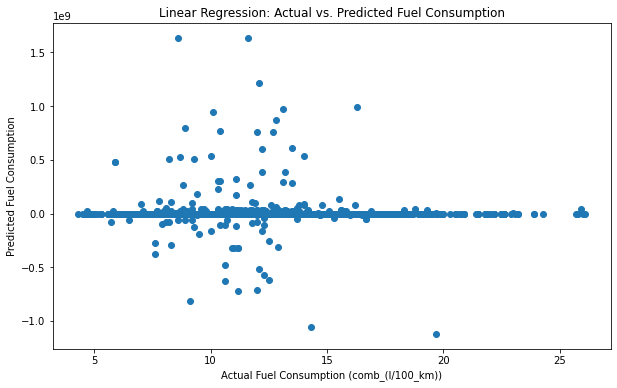

In [42]:



# Select the categorical columns for one-hot encoding
categorical_columns = ['make', 'transmission', 'fuel_type', 'vehicle_class', 'model_year', 'model']
# Perform one-hot encoding on the categorical columns
combined_df_encoded = pd.get_dummies(combined_df, columns=categorical_columns, drop_first=True)

# Split the data into features (X) and target variable (y)
X = combined_df_encoded.drop('comb_(l/100_km)', axis=1)
y = combined_df_encoded['comb_(l/100_km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using metrics such as mean squared error, R-squared, etc.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting the model
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fuel Consumption (comb_(l/100_km))')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Linear Regression: Actual vs. Predicted Fuel Consumption')
plt.show()

optimize

C:\Users\mehad\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Selected Features:
Index(['engine_size_(l)', 'cylinders', 'co2_emissions_(g/km)', 'co2_rating',
       'fuel_type_E'],
      dtype='object')
Mean Squared Error: 0.10687056637367533
R-squared: 0.9892809035842595


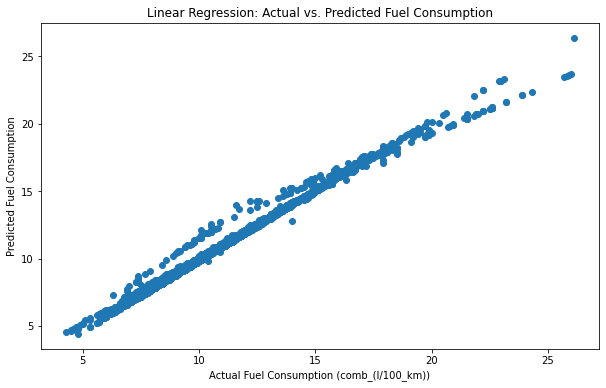

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the categorical columns for one-hot encoding
categorical_columns = ['make', 'transmission', 'fuel_type', 'vehicle_class', 'model_year', 'model']
# Perform one-hot encoding on the categorical columns
combined_df_encoded = pd.get_dummies(combined_df, columns=categorical_columns, drop_first=True)

# Split the data into features (X) and target variable (y)
X = combined_df_encoded.drop(['comb_(l/100_km)', 'fuel_consumption_city_(l/100_km)', 'hwy_(l/100_km)', 'comb_(mpg)'], axis=1)
y = combined_df_encoded['comb_(l/100_km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the top k features using SelectKBest
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_features = X.columns[selected_feature_indices]

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Perform predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model using metrics such as mean squared error, R-squared, etc.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the selected features and evaluation metrics
print("Selected Features:")
print(selected_features)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting the model
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fuel Consumption (comb_(l/100_km))')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Linear Regression: Actual vs. Predicted Fuel Consumption')
plt.show()


Here's how you can interpret the scatterplot:

Data Distribution: Each point on the scatterplot represents an instance from the test set. The x-axis represents the actual fuel consumption values, while the y-axis represents the predicted fuel consumption values by the linear regression model.

Ideal Scenario: In an ideal scenario, all the points would fall exactly on a diagonal line with a slope of 1. This means that the predicted values perfectly match the actual values. However, this is rarely achievable in practice.

Scatterplot Pattern: By observing the scatterplot, you can identify the pattern formed by the points. If the points are closely clustered around the diagonal line, it indicates that the model's predictions are accurate and consistent with the actual values. On the other hand, if the points are spread out in a wider range, it suggests a higher level of variability or error in the predictions.

How can we predict the fuel consumption (co2_emissions_(g/km)) of a vehicle based on its characteristics? --Decision Tree Regression 

Mean Squared Error: 8.737693631669535
R-squared: 0.9977266286514032


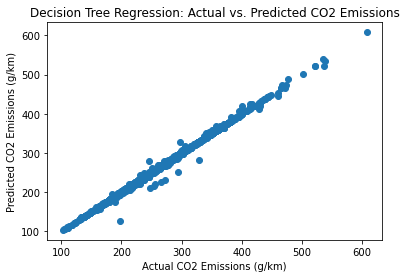

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = combined_df_encoded.drop('co2_emissions_(g/km)', axis=1)
y = combined_df_encoded['co2_emissions_(g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using metrics such as mean squared error, R-squared, etc.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt

# Plotting the model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Decision Tree Regression: Actual vs. Predicted CO2 Emissions')
plt.show()


Optimize

C:\Users\mehad\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Selected Features:
Index(['engine_size_(l)', 'cylinders', 'fuel_consumption_city_(l/100_km)',
       'hwy_(l/100_km)', 'comb_(l/100_km)', 'comb_(mpg)'],
      dtype='object')
Mean Squared Error: 50.14359257041688
R-squared: 0.9869536503028523


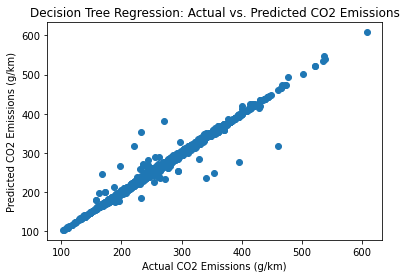

In [45]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor

# Select the features and target variable
X = combined_df_encoded.drop('co2_emissions_(g/km)', axis=1)
y = combined_df_encoded['co2_emissions_(g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
regressor = DecisionTreeRegressor()

# Select the top k features using SelectKBest
k = 6  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_features = X.columns[selected_feature_indices]

# Fit the decision tree regressor on the selected features
regressor.fit(X_train_selected, y_train)

# Predict the CO2 emissions on the test set
y_pred = regressor.predict(X_test_selected)

# Evaluate the model using metrics such as mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the selected features and evaluation metrics
print("Selected Features:")
print(selected_features)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


import matplotlib.pyplot as plt

# Plotting the model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Decision Tree Regression: Actual vs. Predicted CO2 Emissions')
plt.show()


How accurately can we predict the CO2 Rating and Smog Rating of vehicles using the given features in dataset? - RandomForest Regression

Random Forest is an ensemble model that consists of multiple decision trees. The number of trees in the forest is controlled by the n_estimators hyperparameter. Training a large number of trees can increase the computation time as each tree is constructed independently. By default, the number of estimators (trees) in a Random Forest regressor is set to 100. 

CO2 Rating:
Mean Squared Error: 0.03499713138267356
R-squared: 0.9746301300452619
Smog Rating:
Mean Squared Error: 0.3781985083189902
R-squared: 0.7628433514015527


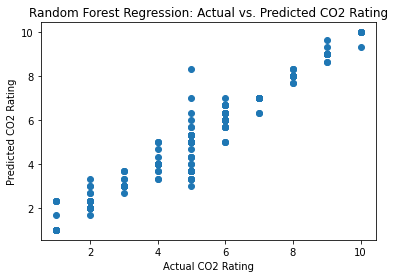

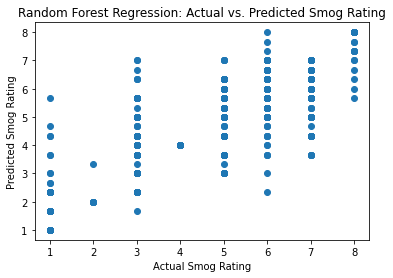

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into features (X) and target variables (y)
X = combined_df_encoded.drop(['co2_rating', 'smog_rating'], axis=1)
y_co2 = combined_df_encoded['co2_rating']
y_smog = combined_df_encoded['smog_rating']

# Split the data into training and testing sets
X_train, X_test, y_train_co2, y_test_co2, y_train_smog, y_test_smog = train_test_split(X, y_co2, y_smog, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor model for CO2 Rating
model_co2 = RandomForestRegressor(n_estimators=3)
model_co2.fit(X_train, y_train_co2)

# Initialize and fit the Random Forest Regressor model for Smog Rating
model_smog = RandomForestRegressor(n_estimators=3)
model_smog.fit(X_train, y_train_smog)

# Perform predictions on the test set for CO2 Rating
y_pred_co2 = model_co2.predict(X_test)

# Perform predictions on the test set for Smog Rating
y_pred_smog = model_smog.predict(X_test)

# Evaluate the model using metrics such as mean squared error, R-squared, etc. for CO2 Rating
mse_co2 = mean_squared_error(y_test_co2, y_pred_co2)
r2_co2 = r2_score(y_test_co2, y_pred_co2)

# Evaluate the model using metrics such as mean squared error, R-squared, etc. for Smog Rating
mse_smog = mean_squared_error(y_test_smog, y_pred_smog)
r2_smog = r2_score(y_test_smog, y_pred_smog)

# Print the evaluation metrics for CO2 Rating
print("CO2 Rating:")
print("Mean Squared Error:", mse_co2)
print("R-squared:", r2_co2)

# Print the evaluation metrics for Smog Rating
print("Smog Rating:")
print("Mean Squared Error:", mse_smog)
print("R-squared:", r2_smog)

# Plotting the CO2 Rating model
plt.scatter(y_test_co2, y_pred_co2)
plt.xlabel('Actual CO2 Rating')
plt.ylabel('Predicted CO2 Rating')
plt.title('Random Forest Regression: Actual vs. Predicted CO2 Rating')
plt.show()

# Plotting the Smog Rating model
plt.scatter(y_test_smog, y_pred_smog)
plt.xlabel('Actual Smog Rating')
plt.ylabel('Predicted Smog Rating')
plt.title('Random Forest Regression: Actual vs. Predicted Smog Rating')
plt.show()


optimze 1

C:\Users\mehad\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Selected Features:
Index(['cylinders', 'fuel_consumption_city_(l/100_km)', 'comb_(l/100_km)',
       'comb_(mpg)', 'co2_emissions_(g/km)'],
      dtype='object')
CO2 Rating:
Mean Squared Error: 0.14705165788702435
R-squared: 0.893400364834775
Smog Rating:
Mean Squared Error: 0.8478428295632902
R-squared: 0.4683438470152258


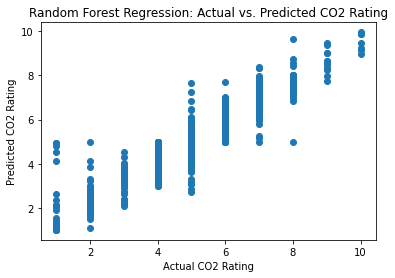

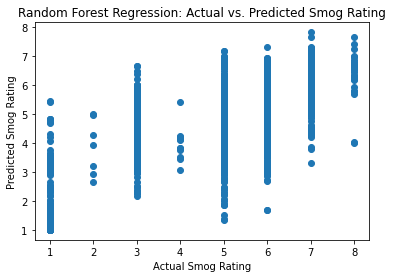

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variables (y)
X = combined_df_encoded.drop(['co2_rating', 'smog_rating'], axis=1)
y_co2 = combined_df_encoded['co2_rating']
y_smog = combined_df_encoded['smog_rating']

# Split the data into training and testing sets
X_train, X_test, y_train_co2, y_test_co2, y_train_smog, y_test_smog = train_test_split(X, y_co2, y_smog, test_size=0.2, random_state=42)

# Select the top k features using SelectKBest
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train_co2)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_features = X.columns[selected_feature_indices]

# Initialize and fit the Random Forest Regressor model
model_co2 = RandomForestRegressor()
model_co2.fit(X_train_selected, y_train_co2)

model_smog = RandomForestRegressor()
model_smog.fit(X_train_selected, y_train_smog)

# Perform predictions on the test set
y_pred_co2 = model_co2.predict(X_test_selected)
y_pred_smog = model_smog.predict(X_test_selected)

# Evaluate the model using metrics such as mean squared error, R-squared, etc.
mse_co2 = mean_squared_error(y_test_co2, y_pred_co2)
r2_co2 = r2_score(y_test_co2, y_pred_co2)

mse_smog = mean_squared_error(y_test_smog, y_pred_smog)
r2_smog = r2_score(y_test_smog, y_pred_smog)

# Print the selected features and evaluation metrics
print("Selected Features:")
print(selected_features)

print("CO2 Rating:")
print("Mean Squared Error:", mse_co2)
print("R-squared:", r2_co2)

print("Smog Rating:")
print("Mean Squared Error:", mse_smog)
print("R-squared:", r2_smog)

import matplotlib.pyplot as plt

# Plotting the CO2 Rating model
plt.scatter(y_test_co2, y_pred_co2)
plt.xlabel('Actual CO2 Rating')
plt.ylabel('Predicted CO2 Rating')
plt.title('Random Forest Regression: Actual vs. Predicted CO2 Rating')
plt.show()

# Plotting the Smog Rating model
plt.scatter(y_test_smog, y_pred_smog)
plt.xlabel('Actual Smog Rating')
plt.ylabel('Predicted Smog Rating')
plt.title('Random Forest Regression: Actual vs. Predicted Smog Rating')
plt.show()

Multivariate Multivariate Linear Regression with statsmodels

for comb_(l/100_km)
Mean Squared Error: 0.05274938641607102
R-squared: 0.9947092471009464


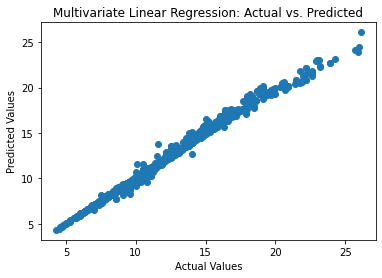

In [53]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Select the categorical columns for one-hot encoding
categorical_columns = ['make', 'transmission', 'fuel_type', 'vehicle_class', 'model_year', 'model']
# Perform one-hot encoding on the categorical columns
combined_df_encoded = pd.get_dummies(combined_df, columns=categorical_columns, drop_first=True)

# Split the data into features (X) and target variable (y)
X = combined_df_encoded.drop(['comb_(l/100_km)', 'fuel_consumption_city_(l/100_km)', 'hwy_(l/100_km)', 'comb_(mpg)'], axis=1)
y = combined_df_encoded['comb_(l/100_km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant column to the features
X_train = sm.add_constant(X_train)

# Fit the multivariate linear regression model using OLS
model = sm.OLS(y_train, X_train)
results = model.fit()

# Add a constant column to the test features
X_test = sm.add_constant(X_test)

# Predict the values using the trained model
y_pred = results.predict(X_test)

# Evaluate the model using metrics such as mean squared error, R-squared, etc. for Smog Rating
mse = mean_squared_error(y_test, y_pred)
rSQ = r2_score(y_test, y_pred)

# Print the evaluation metrics 
print("for comb_(l/100_km)")
print("Mean Squared Error:", mse)
print("R-squared:", rSQ)

# Plotting the predicted values versus the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multivariate Linear Regression: Actual vs. Predicted')
plt.show()
